## Question 1a

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import math

In [9]:


# Load the data from file
data = np.loadtxt('f150_motor_distributors.txt', delimiter=',')

# Extract the timing speed and coil gaps columns
timing_speed = data[:,0]
coil_gaps = data[:,1]

# Combine the two columns to create the two-dimensional dataset
dataset = np.column_stack((timing_speed, coil_gaps))

# Check the shape of the dataset
print("Dataset shape:", dataset.shape)


Dataset shape: (5000, 2)


In [12]:

# Given initialization
x1 = np.array([10, 10])
x2 = np.array([-10, -10])
x3 = np.array([2, 2])
x4 = np.array([3, 3])
x5 = np.array([-3, -3])

# Number of clusters
k = 5

# Initialize centroids using the given initialization
centroids = np.array([x1, x2, x3, x4, x5])
centroids

array([[ 10,  10],
       [-10, -10],
       [  2,   2],
       [  3,   3],
       [ -3,  -3]])

In [23]:
for i in range(100):
    # Calculate distances between data points and centroids
    distances = np.linalg.norm(data - centroids[:, np.newaxis], axis=2)
    # Find the index of the nearest centroid for each data point
    nearest_centroid_index = np.argmin(distances, axis=0)
    # Assign each data point to the nearest cluster
    clusters = nearest_centroid_index  
    # Update centroids based on mean of data points in each cluster
    for j in range(k):
        centroids[j] = np.mean(data[clusters == j], axis=0)
print('Centroids:', centroids)

Centroids: [[ 26  -1]
 [-30   2]
 [  0  -2]
 [ 11  -1]
 [-12   0]]


## Question 1b

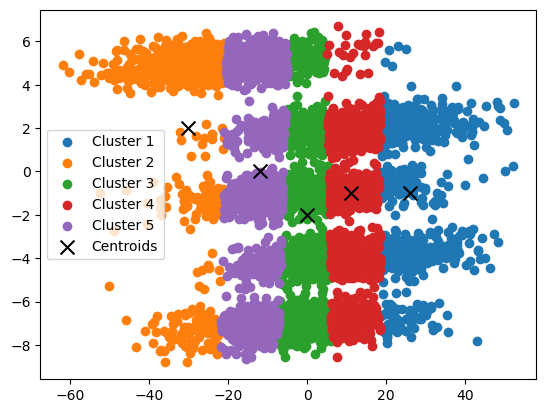

In [21]:
import math

# Run k-means algorithm for 100 iterations
for i in range(100):
    # Initialize empty clusters
    clusters = [[] for _ in range(k)]
    
    # Assign each data point to the nearest centroid
    for point in dataset:
        distances = [math.sqrt(np.sum((point - centroid)**2)) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters[cluster].append(point)
    
    # Update centroids
    for j in range(k):
        centroids[j] = np.mean(clusters[j], axis=0)
    
# Scatter the results in two dimensions with different clusters as different colors
for j in range(k):
    cluster_points = np.array(clusters[j])
    plt.scatter(cluster_points[:,0], cluster_points[:,1], label='Cluster {}'.format(j+1))

plt.scatter(centroids[:,0], centroids[:,1], color='black', marker='x', s=100, label='Centroids')
plt.legend()
plt.show()



## Question 1c


After plotting the resulting clusters, we can observe that the k-means algorithm didn't cluster perfectly, because there is a lot of overlap between the data points of different clusters.

To improve the clustering performance, we could try different initialization methods, such as random initialization. Random initialization would randomly select k data points as initial centroids.We can also try a different clustering algorithm altogether, such as hierarchical clustering or density-based clustering, which may be better suited for this dataset.

## Question 2a

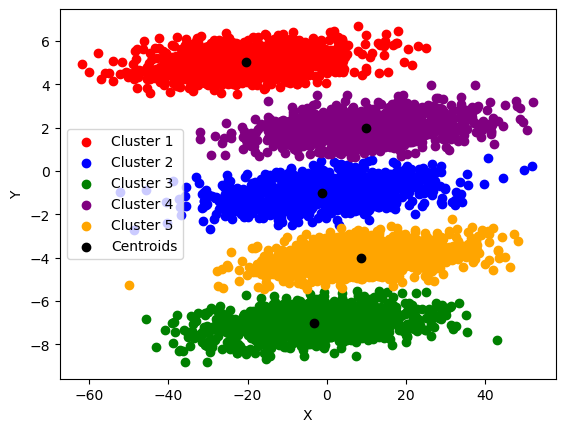

In [25]:

P = np.array([
    [10, 0.5],
    [-10, 0.25]
]).astype('float64')

def mahalanobis_distance(x, y):
    diff = x - y
    return np.dot(np.dot(diff, np.linalg.inv(P.T @ P)), diff.T)

# Initialize centroids randomly
centroids = data[np.random.choice(data.shape[0], k, replace=False), :]
labels = np.zeros(data.shape[0])
for i in range(100):
    # Calculate distances between data points and centroids
    distances = np.zeros((data.shape[0], k))
    for j in range(k):
        distances[:, j] = np.apply_along_axis(mahalanobis_distance, 1, data, centroids[j])

    # Assign each data point to the nearest cluster
    labels = np.argmin(distances, axis=1)

    # Update centroids based on mean of data points in each cluster
    for j in range(k):
        centroids[j] = np.mean(data[labels == j], axis=0)

data_copy = data

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(k):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], color=colors[i])

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='o')

plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Centroids'])
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

## Question 2b

In [27]:
# 2b)
# Calculate the mean of the data
mean = np.mean(dataset, axis=0)

# Subtract the mean from the data
data_centered = dataset - mean

# Calculate the covariance matrix of the centered data
covariance = np.cov(data_centered, rowvar=False)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance)

# Sort the eigenvectors by decreasing eigenvalues
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sort_indices]

# Print the principal components (eigenvectors)
print("Principal components:")
for i in range(len(eigenvectors)):
    print("PC{}: {}".format(i+1, eigenvectors[:, i]))

Principal components:
PC1: [ 0.99838317 -0.05684225]
PC2: [0.05684225 0.99838317]


In [30]:
# alternative way to prove same result
from sklearn.decomposition import PCA
data = np.loadtxt('f150_motor_distributors.txt', delimiter=',')
calculate_pca = PCA()
calculate_pca.fit(data)
print(calculate_pca.components_)

[[-0.99838317  0.05684225]
 [-0.05684225 -0.99838317]]


## Question 2c

In [31]:
# Load data
for i in range(5):
    calculate_pca = PCA()
    calculate_pca.fit(data_copy[clusters==i])
    print(calculate_pca.components_)

[[ 0.99867381  0.05148422]
 [ 0.05148422 -0.99867381]]
[[-0.99032816  0.13874486]
 [-0.13874486 -0.99032816]]
[[ 0.27005723  0.96284427]
 [ 0.96284427 -0.27005723]]
[[ 0.99971306  0.02395407]
 [-0.02395407  0.99971306]]
[[-0.01119334 -0.99993735]
 [-0.99993735  0.01119334]]


## Question 2d

In [32]:
# 2d

# Define P
P = np.array([[10, 0.5], [-10, 0.25]])

# Calculate eigenvectors and eigenvalues of PT
eig_vals, eig_vecs = np.linalg.eig(P.T)

# Sort eigenvalues in decreasing order
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:,idx]

# Calculate Λ and Φ
Λ = np.diag(eig_vals)
Φ = eig_vecs

# Calculate P′
P_prime = Λ @ Φ

# Print out P and P′
print("P:")
print(P)
print("\nP':")
print(P_prime)

# Calculate the relationship between P' and the data
data = np.array([[1, 2], [3, 4], [5, 6]])
data_prime = data @ P_prime

print("\nData:")
print(data)
print("\nData':")
print(data_prime)



P:
[[ 10.     0.5 ]
 [-10.     0.25]]

P':
[[9.44301625 6.95724558]
 [0.04300577 0.53717161]]

Data:
[[1 2]
 [3 4]
 [5 6]]

Data':
[[ 9.52902778  8.0315888 ]
 [28.50107182 23.02042317]
 [47.47311585 38.00925755]]


## Question 3



3.a)

Using the Fk−1 × F1 merging strategy, we need to combine frequent 3-itemsets with a single item to generate candidate 4-itemsets. Therefore, the candidate 4-itemsets are:

{1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}


3.b)

Using the Fk−1 × Fk−1 merging strategy, we need to combine frequent 3-itemsets with each other to generate candidate 4-itemsets. Therefore, the candidate 4-itemsets are:

{1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}, {1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}, {1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}, {1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}

Note that there are duplicates because the order in which we combine the frequent itemsets matters.

3.c)

To find all candidate 4-itemsets that survive the candidate pruning step of the Apriori algorithm, we need to perform the following steps:

Generate candidate 4-itemsets by joining F3 with itself using the Fk−1 × Fk−1 merging strategy:
{1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}

Prune candidate 4-itemsets that contain any infrequent 3-itemsets:
{1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {2, 3, 4, 5}

Therefore, the candidate 4-itemsets that survive the candidate pruning step of the Apriori algorithm are:

{1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {2, 3, 4, 5}

## Question 4


4.a)

The maximum number of association rules that can be extracted from this data (including rules that have zero support) can be calculated using the formula:

2^(n) - n - 1

where n is the number of distinct items in the dataset.

In this case, there are 7 distinct items: Beer, Milk, Bread, Butter, Diapers, Cookies, and Eggs. Therefore, the maximum number of association rules that can be extracted from this data is:

2^(7) - 7 - 1 = 127 - 7 - 1 = 119

So, the maximum number of association rules that can be extracted from this data is 119.


4.b)

The confidence of the rule {Milk, Diapers} ⇒ {Butter} is 3/4 or 75%. This is because out of the 4 transactions that contain Milk and Diapers, 3 of them also contain Butter.

4.c)

The support for the rule {Milk, Diapers} ⇒ {Butter} is 3/10 or 30%. This is because the rule appears in 3 out of the 10 transactions.

4.d)

False. Just because {a,b,c,d} is frequent, it doesn't mean that {a,b} is always frequent. For example, {a,b,c,d} could appear in all 100 transactions, but {a,b} could appear in only 50 transactions, which would make it infrequent.

4.e)

False. Just because {a,b}, {b,c}, and {a,c} are frequent itemsets, it doesn't mean that {a,b,c} is always frequent. For example, {a,b}, {b,c}, and {a,c} could each appear in 100 transactions, but the combination of all three could appear in only 50 transactions, which would make it infrequent.

4.f)

False. It's not possible to determine the support of {b} based on the support of {a,b} and {b,c} alone. {b} could appear in many other transactions that don't contain either {a,b} or {b,c}, which would increase its support.

4.g)

 False. In a dataset that has 5 items, the maximum number of size-2 frequent itemsets that can be extracted (assuming minsup > 0) is 10. This is because there are 5 items and the maximum number of size-2 itemsets is equal to the number of possible 2-item combinations, which is 5 choose 2 or 10.

4.h)

This is the itemset lattice for the set of unique items I = {a, b, c}. The top level represents the empty set, {}, which is a subset of every itemset. The next level has the individual items, {a}, {b}, and {c}, and the next level has the size-2 itemsets, {a,b}, {b,c}, and {a,c}. The bottom level has the size-3 itemset, {b}, which is the only frequent itemset in this lattice.